# Проведение исследований с решающим деревом

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Шаг 1: Загрузка данных
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
housing_data = data['data']
housing_target = data['target']

# Для классификации создадим категории цен
housing_target_class = pd.cut(housing_target, bins=3, labels=["Доступное", "Среднее", "Дорогое"])

# Добавим категориальный столбец в общий DataFrame для удобства
housing_data['PriceCategory'] = housing_target_class

# Выводим первые несколько строк
print("Данные о недвижимости:")
print(housing_data.head())


Данные о недвижимости:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude PriceCategory  
0    -122.23       Дорогое  
1    -122.22       Дорогое  
2    -122.24       Дорогое  
3    -122.25       Дорогое  
4    -122.25       Дорогое  


In [3]:
# Шаг 2: Разделение данных на обучающую и тестовую выборки

# Для задачи классификации
X_class = housing_data.drop(columns=['PriceCategory'])
y_class = housing_data['PriceCategory']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Для задачи регрессии
X_reg = housing_data.drop(columns=['PriceCategory'])
y_reg = housing_target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [4]:
# Шаг 3: Нормализация данных

scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


## Базовая модель для классификации

In [5]:
# Обучаем модель решающего дерева для классификации
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class_scaled, y_train_class)

# Оценка качества классификации
y_pred_class = dt_classifier.predict(X_test_class_scaled)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
print(f"Классификация: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")


Классификация: Accuracy = 0.75, F1 = 0.75


## Базовая модель для регрессии

In [6]:
# Обучаем модель решающего дерева для регрессии
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg_scaled, y_train_reg)

# Оценка качества регрессии
y_pred_reg = dt_regressor.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Регрессия: MSE = {mse:.4f}")


Регрессия: MSE = 0.49


## Оптимизация гиперпараметров

In [7]:
# Оптимизация для классификации
param_grid_class = {'max_depth': range(1, 21), 'min_samples_split': range(2, 11)}
grid_class = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_class, scoring='f1_weighted', cv=5)
grid_class.fit(X_train_class_scaled, y_train_class)

best_dt_classifier = grid_class.best_estimator_
print(f"Лучшие параметры для классификации: {grid_class.best_params_}")

# Оценка оптимизированной модели классификации
y_pred_class_opt = best_dt_classifier.predict(X_test_class_scaled)
accuracy_opt = accuracy_score(y_test_class, y_pred_class_opt)
f1_opt = f1_score(y_test_class, y_pred_class_opt, average='weighted')
print(f"Оптимизированная классификация: Accuracy = {accuracy_opt:.4f}, F1 = {f1_opt:.4f}")

# Оптимизация для регрессии
param_grid_reg = {'max_depth': range(1, 21), 'min_samples_split': range(2, 11)}
grid_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_reg, scoring='neg_mean_squared_error', cv=5)
grid_reg.fit(X_train_reg_scaled, y_train_reg)

best_dt_regressor = grid_reg.best_estimator_
print(f"Лучшие параметры для регрессии: {grid_reg.best_params_}")

# Оценка оптимизированной модели регрессии
y_pred_reg_opt = best_dt_regressor.predict(X_test_reg_scaled)
mse_opt = mean_squared_error(y_test_reg, y_pred_reg_opt)
print(f"Оптимизированная регрессия: MSE = {mse_opt:.4f}")


Лучшие параметры для классификации: {'max_depth': 10, 'min_samples_split': 7}
Оптимизированная классификация: Accuracy = 0.77, F1 = 0.77
Лучшие параметры для регрессии: {'max_depth': 9, 'min_samples_split': 10}
Оптимизированная регрессия: MSE = 0.41


### Сравнение результатов

In [ ]:
# Сравнение результатов
print(f"Базовая классификация: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")
print(f"Оптимизированная классификация: Accuracy = {accuracy_opt:.4f}, F1 = {f1_opt:.4f}")
print(f"Базовая регрессия: MSE = {mse:.4f}")
print(f"Оптимизированная регрессия: MSE = {mse_opt:.4f}")


## Визуализация

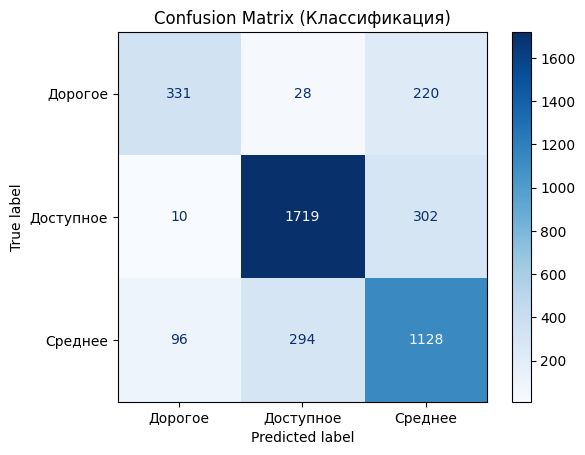

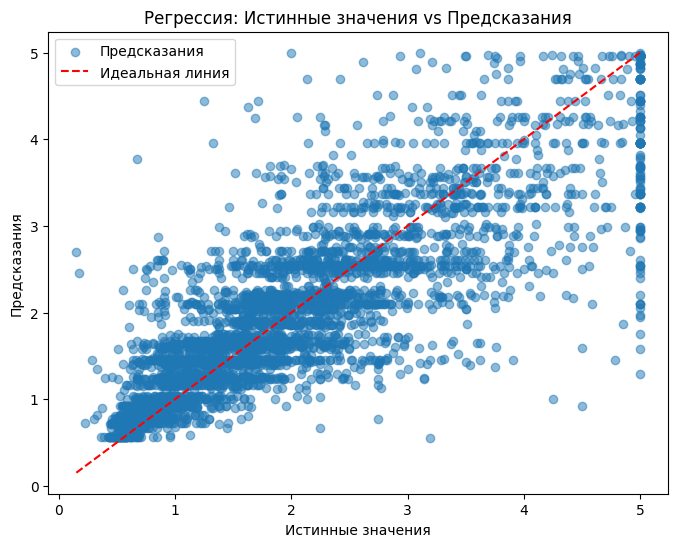

In [8]:
# Классификация: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_class, y_pred_class_opt, labels=grid_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Классификация)")
plt.show()

# Регрессия: График предсказаний vs Истинные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_opt, alpha=0.5, label="Предсказания")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', label="Идеальная линия")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.title("Регрессия: Истинные значения vs Предсказания")
plt.legend()
plt.show()


## Реализация решающего дерева вручную

In [17]:
import numpy as np
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score

class CustomDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, criterion='entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # Останавливаем рекурсию, если достигли максимальной глубины или слишком малое количество данных
        if len(unique_classes) == 1 or n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]  # Возвращаем наиболее частый класс

        # Ищем лучший раздел
        best_split = self._best_split(X, y, n_features)
        left_tree = self._build_tree(*best_split['left'], depth + 1)
        right_tree = self._build_tree(*best_split['right'], depth + 1)

        return {'feature': best_split['feature'], 'threshold': best_split['threshold'],
                'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y, n_features):
        best_split = {}
        best_score = float('inf') if self.criterion == 'mse' else -float('inf')

        for feature_index in range(n_features):
            possible_thresholds = np.unique(X[:, feature_index])

            for threshold in possible_thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                if self.criterion == 'entropy':
                    score = self._entropy(left_y, right_y)
                else:
                    score = self._mse(left_y, right_y)

                # Обновляем лучший раздел
                if (self.criterion == 'entropy' and score > best_score) or (self.criterion == 'mse' and score < best_score):
                    best_score = score
                    best_split = {'feature': feature_index, 'threshold': threshold,
                                  'left': (X[left_mask], left_y), 'right': (X[right_mask], right_y)}

        return best_split

    def _entropy(self, left_y, right_y):
        return self._information_gain(left_y, right_y)

    def _information_gain(self, left_y, right_y):
        total_size = len(left_y) + len(right_y)
        left_entropy = self._calculate_entropy(left_y)
        right_entropy = self._calculate_entropy(right_y)

        return left_entropy * (len(left_y) / total_size) + right_entropy * (len(right_y) / total_size)

    def _calculate_entropy(self, y):
        class_counts = Counter(y)
        total = len(y)
        entropy = 0
        for count in class_counts.values():
            prob = count / total
            entropy -= prob * np.log2(prob) if prob > 0 else 0
        return entropy

    def _mse(self, left_y, right_y):
        left_mse = mean_squared_error(left_y, [np.mean(left_y)] * len(left_y))
        right_mse = mean_squared_error(right_y, [np.mean(right_y)] * len(right_y))

        total_size = len(left_y) + len(right_y)
        return (left_mse * len(left_y) + right_mse * len(right_y)) / total_size

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                return self._predict_single(x, tree['left'])
            else:
                return self._predict_single(x, tree['right'])
        else:
            return tree

# Обучение классификатора
custom_dt_classifier = CustomDecisionTree(max_depth=10, criterion='entropy')
custom_dt_classifier.fit(X_train_class_scaled, y_train_class)

# Оценка качества классификации
y_pred_class_custom = custom_dt_classifier.predict(X_test_class_scaled)
accuracy_class_custom = accuracy_score(y_test_class, y_pred_class_custom)
f1_class_custom = f1_score(y_test_class, y_pred_class_custom, average='weighted')
print(f"Кастомная классификация: Accuracy = {accuracy_class_custom:.2f}, F1 = {f1_class_custom:.2f}")

# Обучение регрессора
custom_dt_regressor = CustomDecisionTree(max_depth=10, criterion='mse')
custom_dt_regressor.fit(X_train_reg_scaled, y_train_reg)

# Оценка качества регрессии
y_pred_reg_custom = custom_dt_regressor.predict(X_test_reg_scaled)
mse_reg_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
print(f"Кастомная регрессия: MSE = {mse_reg_custom:.2f}")


Кастомная классификация: Accuracy = 0.49, F1 = 0.33
Кастомная регрессия: MSE = 0.75
